# Sandbox 

Sandbox for main python scripts

In [1]:
import osmnx as ox

In [2]:
places = ox.geocode_to_gdf(['Paris, France'])


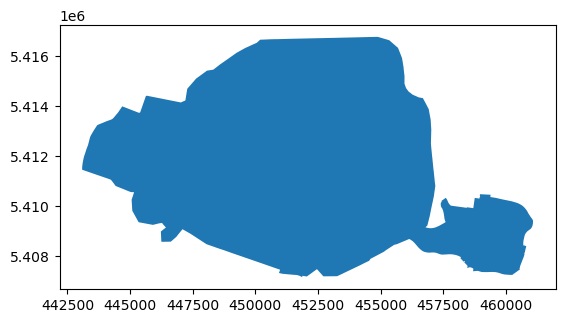

In [3]:
places = ox.project_gdf(places)

ax = places.plot()


# Morphometrics errors

This chunk of code was copied from the main script on 8/1/2023 to debug an issue loading and saving geopackages.

In [5]:
#!/usr/bin/env python
# coding: utf-8
"""
Get Buildings and Streets and run Morphometrics
"""
# Import modules

import os
from pathlib import Path

import geopandas as gpd
import imageio
import momepy
import numpy as np
import osmnx as ox

from helpers import (
    count_and_merge,
    format_time,
    fractal_dimension,
    get_bearings,
    get_orientation_order,
    pp_compactness,
)

# Choose City
city_list = [
    "Melbourne",
    "Jerusalem",
    "Buenos Aires",
    "Paris",
    "Rotterdam",
    "Nashville",
    "Singapore",
    "Cape Town",
    "New York",
    "Los Angeles",
    "Chicago",
    "Boston",
    "Austin",
    "Seattle",
    "Philadelphia",
    "Pittsburgh",
    "Washington DC",
    "San Francisco",
    "SF Bay Area ",
    "Raleigh",
    "Milwaukee",
    "Portland",
    "San Diego",
    "Denver",
    "Miami",
    "Saint Louis",
    "Houston",
    "Atlanta",
    "Phoenix",
    "Detroit",
    "Minneapolis",
    "Savannah",
    "Charlotte",
    "Las Vegas",
    "Cincinnati",
    "Kansas City",
    "Nashville",
]

city_list = [city_list[15]]
print(f"City list: {', '.join(city_list)}")
city_list = ["Detroit"]

for city in city_list:
    print(f"City: {city}")
    # Buildings and Streets

    # Read Geopackage
    data_folder = Path("../data/")
    input_file = data_folder / "0_boundaries" / city / (city + ".gpkg")

    print(f"Input: {input_file}")
    gdf = gpd.read_file(input_file, driver="GPKG")
    # Force gdf projection
    gdf = ox.project_gdf(gdf, to_crs="epsg:4326", to_latlong=False)

    # Get Master polygon
    # Create unique ID
    gdf = gdf.reset_index(drop=True)
    gdf["UID"] = gdf.index
    # Establish bounds DataFrame (everything so we can do one query)
    gdf["collapse"] = 0
    gdf_collapsed = gdf.dissolve(by="collapse")
    
     # Get Buildings
    tags = {"building": True}
    buildings = ox.geometries_from_polygon(gdf_collapsed["geometry"][0], tags)
    # buildings = ox.features_from_polygon(gdf_collapsed["geometry"][0], tags)
    buildings = buildings[["geometry", "name"]]
    buildings_save = buildings.drop(labels="node", axis=0)

City list: Pittsburgh
City: Detroit
Input: ../data/0_boundaries/Detroit/Detroit.gpkg


/tmp/ipykernel_1097/66507613.py:97: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  buildings_save = buildings.drop(labels="node", axis=0)


In [11]:
buildings_save = buildings.drop(labels="node", axis=0, level=0)

In [16]:
buildings_save

geometry   
element_type osmid                                                         
way          30260210  POLYGON ((-83.04505 42.32978, -83.04502 42.329...  \
             30260356  POLYGON ((-83.05178 42.33290, -83.05181 42.332...   
             40438311  POLYGON ((-83.05665 42.39805, -83.05681 42.398...   
             46139505  POLYGON ((-83.05399 42.33887, -83.05323 42.339...   
             46380299  POLYGON ((-83.05469 42.32548, -83.05523 42.325...   
...                                                                  ...   
relation     14368992  POLYGON ((-83.01843 42.35857, -83.01847 42.358...   
             14647643  MULTIPOLYGON (((-83.07522 42.33554, -83.07518 ...   
             14904045  POLYGON ((-83.00800 42.34081, -83.00761 42.340...   
             14995611  POLYGON ((-83.00638 42.38528, -83.00627 42.385...   
             15442283  MULTIPOLYGON (((-83.06996 42.33055, -83.07045 ...   

                                             name  
element_type osmid                                 
way          30260210         Ally Detroit Center  
             30260356                         NaN  
             40438311         Polish Village Café  
             46139505             Comerica Garage  
             46380299   900 West Jefferson Garage  
...                                           ...  
relation     14368992  New Liberty Baptist Church  
             14647643             Spaulding Court  
             14904045         Captain of the Port  
             14995611  Bethel Baptist Church East  
             15442283                The Eleventh  

[34356 rows x 2 columns]

In [18]:
buildings_save_backup.equals(buildings_save)

True

In [14]:
buildings_save == buildings_save_backup

geometry   name
element_type osmid                    
way          30260210      True   True
             30260356      True  False
             40438311      True   True
             46139505      True   True
             46380299      True   True
...                         ...    ...
relation     14368992      True   True
             14647643      True   True
             14904045      True   True
             14995611      True   True
             15442283      True   True

[34356 rows x 2 columns]

In [10]:
buildings_save_backup = buildings_save.copy()
buildings_save_backup

geometry   
element_type osmid                                                         
way          30260210  POLYGON ((-83.04505 42.32978, -83.04502 42.329...  \
             30260356  POLYGON ((-83.05178 42.33290, -83.05181 42.332...   
             40438311  POLYGON ((-83.05665 42.39805, -83.05681 42.398...   
             46139505  POLYGON ((-83.05399 42.33887, -83.05323 42.339...   
             46380299  POLYGON ((-83.05469 42.32548, -83.05523 42.325...   
...                                                                  ...   
relation     14368992  POLYGON ((-83.01843 42.35857, -83.01847 42.358...   
             14647643  MULTIPOLYGON (((-83.07522 42.33554, -83.07518 ...   
             14904045  POLYGON ((-83.00800 42.34081, -83.00761 42.340...   
             14995611  POLYGON ((-83.00638 42.38528, -83.00627 42.385...   
             15442283  MULTIPOLYGON (((-83.06996 42.33055, -83.07045 ...   

                                             name  
element_type osmid                                 
way          30260210         Ally Detroit Center  
             30260356                         NaN  
             40438311         Polish Village Café  
             46139505             Comerica Garage  
             46380299   900 West Jefferson Garage  
...                                           ...  
relation     14368992  New Liberty Baptist Church  
             14647643             Spaulding Court  
             14904045         Captain of the Port  
             14995611  Bethel Baptist Church East  
             15442283                The Eleventh  

[34356 rows x 2 columns]

In [8]:
import pandas as pd

# Column MultiIndex.
idx = pd.MultiIndex(levels=[['Col1', 'Col2', 'Col3'], ['subcol1', 'subcol2']], 
                    codes=[[2, 1, 0], [0, 1, 1]])

df = pd.DataFrame(columns=range(len(idx)))
df.columns = idx
print(df)

Empty DataFrame
Columns: [(Col3, subcol1), (Col2, subcol2), (Col1, subcol2)]
Index: []


In [9]:
df

,Col3,Col2,Col1
,subcol1,subcol2,subcol2


In [7]:
buildings

geometry   
element_type osmid                                                           
node         367815760                          POINT (-83.06268 42.35176)  \
             2630768462                         POINT (-83.07533 42.35117)   
             2684741883                         POINT (-83.07016 42.34433)   
             3838342342                         POINT (-83.04992 42.33354)   
             3868255827                         POINT (-83.05042 42.35823)   
...                                                                    ...   
relation     14368992    POLYGON ((-83.01843 42.35857, -83.01847 42.358...   
             14647643    MULTIPOLYGON (((-83.07522 42.33554, -83.07518 ...   
             14904045    POLYGON ((-83.00800 42.34081, -83.00761 42.340...   
             14995611    POLYGON ((-83.00638 42.38528, -83.00627 42.385...   
             15442283    MULTIPOLYGON (((-83.06996 42.33055, -83.07045 ...   

                                                         name  
element_type osmid                                             
node         367815760         Canfield Audio Visual Building  
             2630768462                         Freedom Place  
             2684741883             Woodbridge Senior Village  
             3838342342  Detroit Institute of Music Education  
             3868255827                           Diggs Homes  
...                                                       ...  
relation     14368992              New Liberty Baptist Church  
             14647643                         Spaulding Court  
             14904045                     Captain of the Port  
             14995611              Bethel Baptist Church East  
             15442283                            The Eleventh  

[34363 rows x 2 columns]

In [6]:
buildings_save

geometry   
element_type osmid                                                         
way          30260210  POLYGON ((-83.04505 42.32978, -83.04502 42.329...  \
             30260356  POLYGON ((-83.05178 42.33290, -83.05181 42.332...   
             40438311  POLYGON ((-83.05665 42.39805, -83.05681 42.398...   
             46139505  POLYGON ((-83.05399 42.33887, -83.05323 42.339...   
             46380299  POLYGON ((-83.05469 42.32548, -83.05523 42.325...   
...                                                                  ...   
relation     14368992  POLYGON ((-83.01843 42.35857, -83.01847 42.358...   
             14647643  MULTIPOLYGON (((-83.07522 42.33554, -83.07518 ...   
             14904045  POLYGON ((-83.00800 42.34081, -83.00761 42.340...   
             14995611  POLYGON ((-83.00638 42.38528, -83.00627 42.385...   
             15442283  MULTIPOLYGON (((-83.06996 42.33055, -83.07045 ...   

                                             name  
element_type osmid                                 
way          30260210         Ally Detroit Center  
             30260356                         NaN  
             40438311         Polish Village Café  
             46139505             Comerica Garage  
             46380299   900 West Jefferson Garage  
...                                           ...  
relation     14368992  New Liberty Baptist Church  
             14647643             Spaulding Court  
             14904045         Captain of the Port  
             14995611  Bethel Baptist Church East  
             15442283                The Eleventh  

[34356 rows x 2 columns]

# EXTRA CODE

In [18]:
out_file = data_folder / "1_buildings_streets" / (city + " - Buildings.gpkg")
out_file.exists()

True

In [19]:
out_file

PosixPath('../data/1_buildings_streets/Pittsburgh - Buildings.gpkg')

In [20]:
out_file.unlink()